<a href="https://colab.research.google.com/github/semaHbo/ev-enerji-tahmini/blob/main/Model_Training/Random_Forest_FeaturePlus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yeni özelliklerle deneme yapilacak

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/train_plus.csv', index_col='date', parse_dates=True)
val_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/val_plus.csv', index_col='date', parse_dates=True)

X_train = train_df.drop(columns=['Enerji_Tuketimi'])
y_train = train_df['Enerji_Tuketimi']

X_val = val_df.drop(columns=['Enerji_Tuketimi'])
y_val = val_df['Enerji_Tuketimi']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Tahmin
y_pred = rf.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Random Forest (Yeni) Performansı:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


Random Forest (Yeni) Performansı:
MAE  : 58.3246
MSE  : 9614.9246
RMSE : 98.0557
R²   : 0.0454


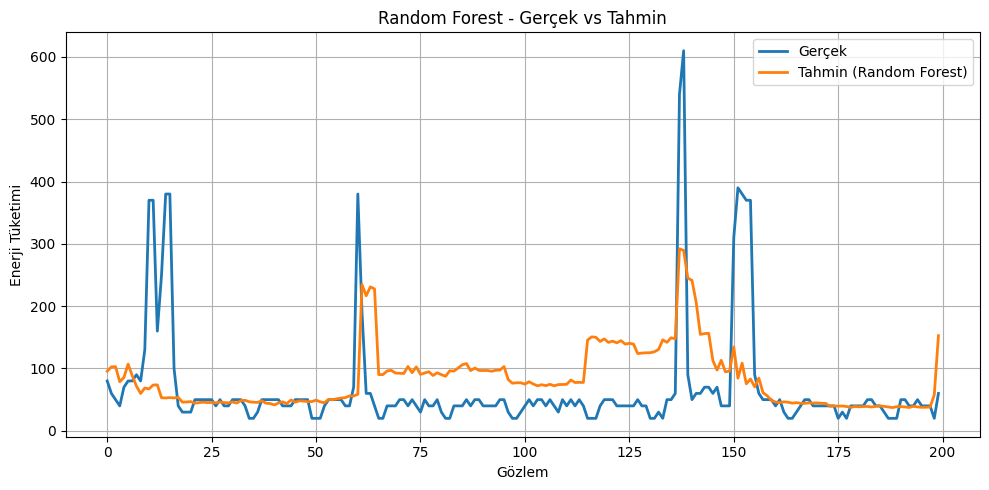

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_val.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred[:200], label="Tahmin (Random Forest)", linewidth=2)
plt.title("Random Forest - Gerçek vs Tahmin")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#log islmei yapilarak degerlendirilecek
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/train_plus.csv', index_col='date', parse_dates=True)
val_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/val_plus.csv', index_col='date', parse_dates=True)

X_train = train_df.drop(columns=['Enerji_Tuketimi'])
y_train_log = np.log1p(train_df['Enerji_Tuketimi'])

X_val = val_df.drop(columns=['Enerji_Tuketimi'])
y_val_real = val_df['Enerji_Tuketimi']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log.fit(X_train, y_train_log)

# orijinal form
y_pred_log = rf_log.predict(X_val)
y_pred = np.expm1(y_pred_log)


In [ ]:
mae = mean_absolute_error(y_val_real, y_pred)
mse = mean_squared_error(y_val_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_real, y_pred)

print(" Random Forest Performansı:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


 Random Forest Performansı:
MAE  : 45.2726
MSE  : 9276.7162
RMSE : 96.3157
R²   : 0.0790


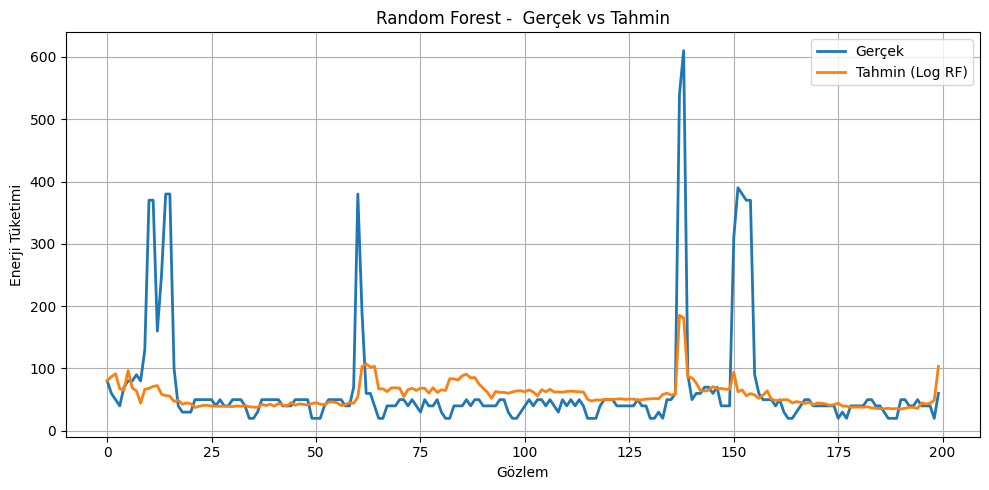

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_val_real.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred[:200], label="Tahmin (Log RF)", linewidth=2)
plt.title("Random Forest -  Gerçek vs Tahmin")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


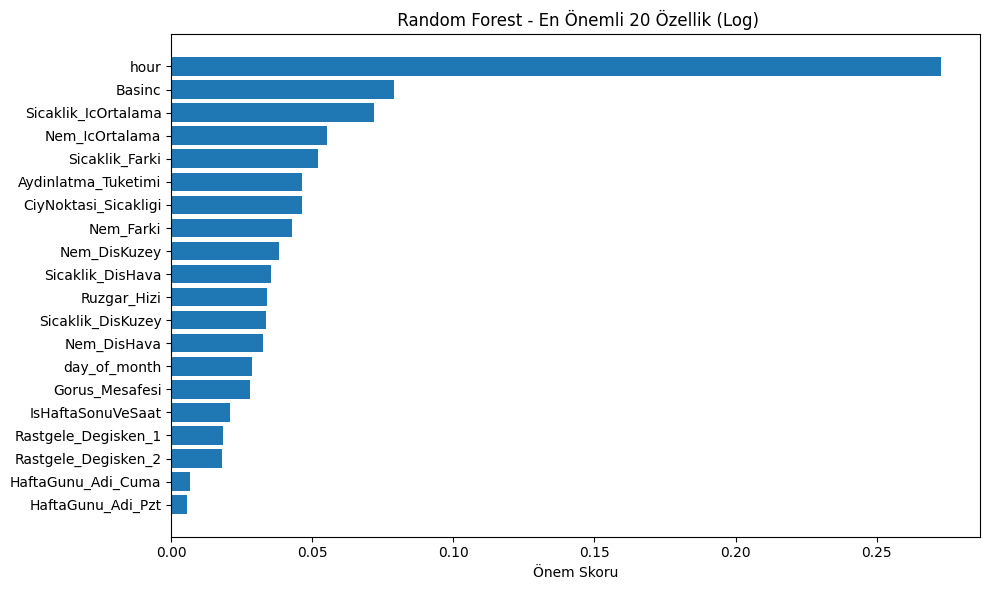

In [ ]:
#Özellik önemleri
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

importances = rf_log.feature_importances_
feature_names = X_train.columns

feature_imp = pd.DataFrame({'Özellik': feature_names, 'Önem': importances})
feature_imp = feature_imp.sort_values(by='Önem', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_imp['Özellik'][:20][::-1], feature_imp['Önem'][:20][::-1])
plt.title(" Random Forest - En Önemli 20 Özellik (Log)")
plt.xlabel("Önem Skoru")
plt.tight_layout()
plt.show()


In [ ]:
# İlk 20 önemli özelliği al
önemli_ozellikler = feature_imp['Özellik'].head(20).tolist()

X_train_sade = X_train[önemli_ozellikler]
X_val_sade = X_val[önemli_ozellikler]


In [ ]:

rf_sade = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sade.fit(X_train_sade, y_train_log)
y_pred_log_sade = rf_sade.predict(X_val_sade)
y_pred_sade = np.expm1(y_pred_log_sade)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_val_real, y_pred_sade)
mse = mean_squared_error(y_val_real, y_pred_sade)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_real, y_pred_sade)

print("Sadeleştirilmiş Random Forest (Log) Performansı:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


Sadeleştirilmiş Random Forest (Log) Performansı:
MAE  : 46.5709
MSE  : 9558.7036
RMSE : 97.7686
R²   : 0.0510


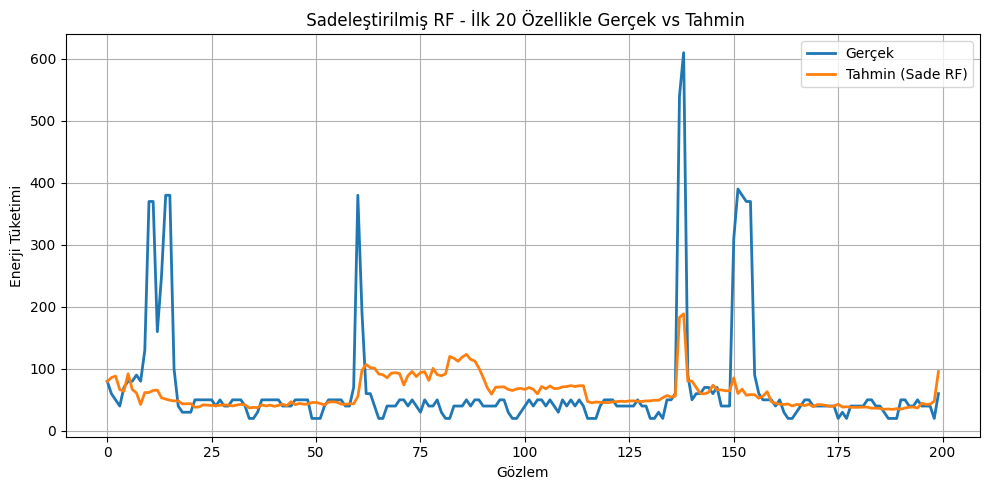

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_val_real.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred_sade[:200], label="Tahmin (Sade RF)", linewidth=2)
plt.title(" Sadeleştirilmiş RF - İlk 20 Özellikle Gerçek vs Tahmin")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',  # MAE minimize edilir
    n_jobs=-1,
    verbose=2
)

# Eğitim
grid_search.fit(X_train_sade, y_train_log)  # sadeleştirilmiş set ile


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
print(" En iyi parametreler:", grid_search.best_params_)
print("En düşük MAE (CV):", -grid_search.best_score_)

 En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
En düşük MAE (CV): 0.4663943202288447


In [ ]:
# En iyi parametrelerle model
rf_best = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42
)

rf_best.fit(X_train_sade, y_train_log)
y_pred_best_log = rf_best.predict(X_val_sade)
y_pred_best = np.expm1(y_pred_best_log)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_val_real, y_pred_best)
mse = mean_squared_error(y_val_real, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_real, y_pred_best)

print("Final Tuned RF (Log) Performansı:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


Final Tuned RF (Log) Performansı:
MAE  : 45.4631
MSE  : 9748.1887
RMSE : 98.7329
R²   : 0.0322
